<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/fluidflow/gaspipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# examples of pressure drop calculations for gas export pipelines

In [ ]:
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

In [ ]:
from neqsim import methods
from neqsim.thermo import fluid, TPflash
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess

fluid1 = fluid("srk")  # create a fluid using the SRK-Eo
fluid1.addComponent("methane", 85.0)
fluid1.addComponent("ethane", 5.0)
fluid1.setMixingRule(2)
fluid1.setTemperature(20.15, "C")
fluid1.setPressure(150.0, "bara")
fluid1.setTotalFlowRate(20.0, "MSm3/day")

TPflash(fluid1)
fluid1.initPhysicalProperties()

diameter = [0.5, 0.5, 0.5] #meter
roughnes = [50.0e-6, 50.0e-6, 50.0e-6] #meter
position = [0.0, 500.0, 1000.0] #meter
height = [0.0, -400.0, -800.0] #meter
outtemperatures =[278.15, 278.15, 278.15] #Kelvin
outHeatU = [15.0, 15.0, 15.0] #W/m2K
wallHeatU = [15.0, 15.0, 15.0]
clearProcess()
stream1 = stream(fluid1)
pipe1 = pipeline(stream1, position, diameter, height, outtemperatures, roughnes,outHeatU,wallHeatU)
runProcess()
print('outlet pressure ', pipe1.getOutStream().getPressure('bara'))
print('outlet temperature ', pipe1.getOutStream().getTemperature('C'))

outlet pressure  159.67223772013034
outlet temperature  23.03322660961834


202


Text(0.5, 0, 'Length [meter]')

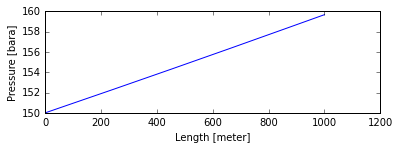

In [ ]:
import matplotlib

numberOfNodes = pipe1.getPipe().getTotalNumberOfNodes()

print(numberOfNodes)
pres = []
temp = []
length = []
height = []

for node in range (0,numberOfNodes):
  pres.append(pipe1.getPipe().getNode(node).getBulkSystem().getPressure('bara'))
  temp.append(pipe1.getPipe().getNode(node).getBulkSystem().getTemperature('C'))
  height.append(pipe1.getPipe().getNode(node).getVerticalPositionOfNode())
  length.append(pipe1.getPipe().getNode(node).getDistanceToCenterOfNode())

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(length, pres, '-')
plt.ylabel('Pressure [bara]')
plt.xlabel('Length [meter]')